# Observing drift in RMSD over a trajectory

In [1]:
%matplotlib inline
import mdtraj as md

Use two files that are distributed with MDTraj examples

In [2]:
crystal_fn = "data/native.pdb"
trajectory_fn = "data/frame0.xtc"

In [3]:
crystal = md.load(crystal_fn)
trajectory = md.load(trajectory_fn, top=crystal)  # load the xtc. the crystal structure defines the topology
trajectory

<mdtraj.Trajectory with 501 frames, 22 atoms, 3 residues, and unitcells at 0x1671883d0>

RMSD with exchangeable hydrogen atoms is generally not a good idea
so let's take a look at just the heavy atoms

In [4]:
rmsds_to_crystal = md.rmsd(trajectory, crystal, 0)
heavy_atoms = [atom.index for atom in crystal.topology.atoms if atom.element.symbol != "H"]
heavy_rmds_to_crystal = md.rmsd(trajectory, crystal, 0, atom_indices=heavy_atoms)

Text(0, 0.5, 'RMSD (nm)')

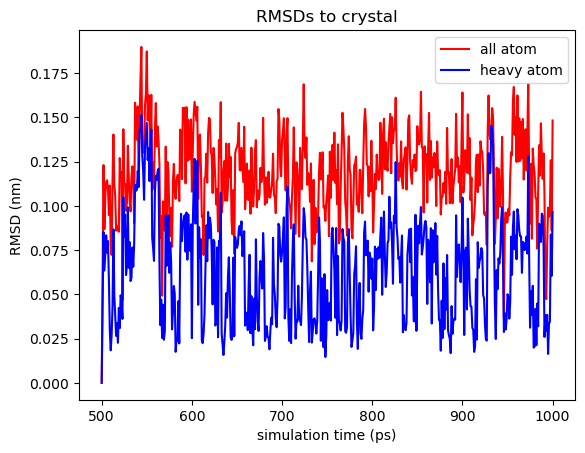

In [5]:
from matplotlib import pyplot as plt

plt.plot(trajectory.time, rmsds_to_crystal, "r", label="all atom")
plt.plot(trajectory.time, heavy_rmds_to_crystal, "b", label="heavy atom")
plt.legend()
plt.title("RMSDs to crystal")
plt.xlabel("simulation time (ps)")
plt.ylabel("RMSD (nm)")